# Image Compression using SVD with Analysis and Visualization


## Introduction
Image compression is a vital area in digital image processing, allowing us to reduce storage requirements and improve transmission speeds while maintaining acceptable visual quality. One powerful method of achieving this is through Singular Value Decomposition (SVD), a mathematical technique that decomposes a matrix into three smaller matrices, representing its most significant features. This notebook demonstrates the use of SVD for image compression and reconstruction, accompanied by data analysis and visualization of the results.


## Importing Libraries
Here, essential Python libraries are imported:

- <span style="color: red;font-weight : 700;">cv2 (OpenCV) <span> <span style="color: white;font-weight : 300;">is used for image loading, processing, and manipulation.<span>
- <span style="color: red;font-weight : 700;">matplotlib.pyplot <span> <span style="color: white;font-weight : 300;">helps in visualizing images and results.<span>
- <span style="color: red;font-weight : 700;">numpy <span> <span style="color: white;font-weight : 300;">is used for numerical computations, particularly the SVD operations.<span>
- <span style="color: red;font-weight : 700;">pandas <span> <span style="color: white;font-weight : 300;">is employed to organize and analyze data, specifically for plotting the singular values.<span>

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load and Preprocess the Image
This section covers loading the image file into the program. It involves reading an image, converting it from BGR to **RGB** format (since OpenCV loads images in **BGR** by default), and extracting its RGB channels (Red, Green, and Blue). The dimensions of the image are printed for analysis. Finally, the original image is displayed using matplotlib.

In [5]:
originalImage = './image.png'
extension = originalImage.split('.')[-1]
name = originalImage.split('.')[0]

### Read the original image

In [6]:
# Read the original image
imageOriginale = cv2.imread(originalImage)
if imageOriginale is None:
    print("Error: Unable to load the image.")
    exit()

### Convert to RGB And Extract RGB channels

In [7]:
# Convert to RGB
image_rgb = cv2.cvtColor(imageOriginale, cv2.COLOR_BGR2RGB)

# Extract RGB channels
r = image_rgb[:, :, 0]
g = image_rgb[:, :, 1]
b = image_rgb[:, :, 2]

print(f"Dimension of the original te : {image_rgb.shape}")

Dimension of the original te : (3741, 6650, 3)


### Display the original image

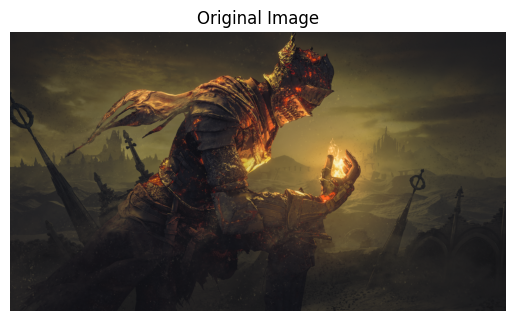

In [ ]:
# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

## Compression and Reconstruction Function

A function <span style="color: red;font-weight : 700;">**compress_image**<span> <span style="color: white;font-weight : 300;">is defined here that applies Singular Value Decomposition (SVD) to the image and returns the compressed image using only the top k singular values. The decomposition produces three matrices <span style="color: red;font-weight : 700;">**(U, S, VT)** <span><span style="color: white;font-weight : 300;">, and by keeping only the top k values, the image is reconstructed.<span>

In [9]:
def compress_image(image, k):
    U, S, VT = np.linalg.svd(image)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    return np.dot(U_k, np.dot(S_k, VT_k)), U, S, VT

## Analyze Results for Different k Values

This part analyzes the effect of different values of **k** **(the number of singular values retained)** on the image compression. The image is converted to grayscale, and then the compression process is performed using various values for **k**. The results are visualized by displaying the compressed image for each value of **k**, showing the relationship between compression and image quality.

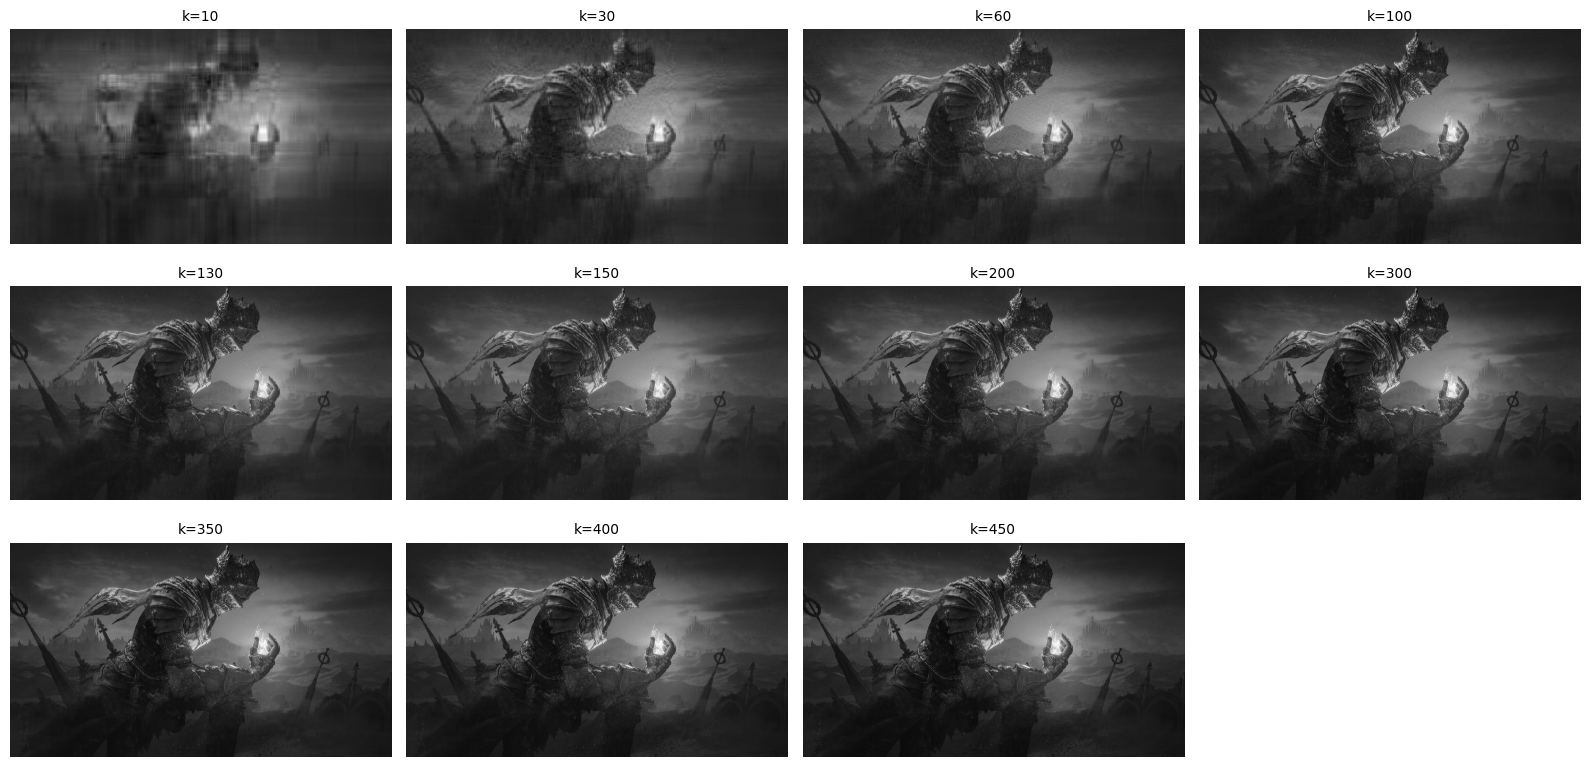

In [10]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(imageOriginale, cv2.COLOR_BGR2GRAY)

# Compress the grayscale image
K = 100
compressed_image, U, S, VT = compress_image(image_gray, K)

# Analyze Results for Different k Values
k_values = [10, 30, 60, 100, 130, 150, 200, 300, 350, 400, 450]
plt.figure(figsize=(16, 8))
cols = 4
rows = int(np.ceil(len(k_values) / cols))

for i, k in enumerate(k_values):
    if k > min(image_gray.shape):
        break
    compressed, _, _, _ = compress_image(image_gray, k)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(compressed, cmap='gray')
    plt.title(f'k={k}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Save the SVD Compression Data

The **SVD** data **(matrices U, S, VT)** corresponding to a particular compression level (**k**) are saved to a file. This allows you to reuse the data for later reconstruction or comparison without needing to recompute the **SVD**.

In [11]:
#save the svd compression
np.savez_compressed(f'svd_compression_{name}_{K}k.npz', U=U[:, :k], S=np.diag(S[:k]), VT=VT[:k, :])

## Compare Sizes of the Original and Compressed Images

Here, the sizes of the original image and the compressed image are compared. The file sizes of the grayscale image and the compressed image (with reduced singular values) are printed in bytes to highlight the effectiveness of compression.

In [12]:
# Compare Sizes of the Original and Compressed Images
image_size = image_gray.nbytes
compressed_size = U[:, :K].nbytes + S[:K].nbytes + VT[:K, :].nbytes

print(f"Size of the original image: {image_size} bytes")
print(f"Size of the compressed image (k={K}): {compressed_size} bytes")

Size of the original image: 24877650 bytes
Size of the compressed image (k=100): 8313600 bytes


## Compress RGB Channels

This section extends the compression to color images by separately compressing the red, green, and blue channels (R, G, and B) of the image. The results are merged back together to form the final compressed color image. The dimensions of the compressed RGB image are printed to ensure the process worked correctly.

In [13]:
# Compress RGB Channels
compressed_r, U_r, S_r, VT_r = compress_image(r, K)
compressed_g, U_g, S_g, VT_g = compress_image(g, K)
compressed_b, U_b, S_b, VT_b = compress_image(b, K)

# Resample RGB Channels
r_resample = compressed_r.reshape(imageOriginale.shape[0], imageOriginale.shape[1])
g_resample = compressed_g.reshape(imageOriginale.shape[0], imageOriginale.shape[1])
b_resample = compressed_b.reshape(imageOriginale.shape[0], imageOriginale.shape[1])

# Merge RGB Channels
compressed_image_rgb = cv2.merge([b_resample, g_resample, r_resample])
compressed_image_rgb = cv2.cvtColor(compressed_image_rgb.astype(np.uint8), cv2.COLOR_BGR2RGB)

print(f"Dimensions of the compressed RGB image: {compressed_image_rgb.shape}")

Dimensions of the compressed RGB image: (3741, 6650, 3)


## Display the Compressed RGB Image

After the compression of RGB channels, the compressed image is displayed. This allows visual inspection of the quality of the compressed color image at a given k value.

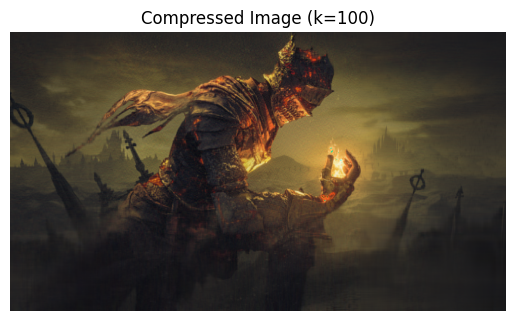

In [14]:
# Display the Compressed RGB Image
plt.imshow(compressed_image_rgb)
plt.title(f'Compressed Image (k={K})')
plt.axis('off')
plt.show()

## Save the Compressed RGB Image

The compressed RGB image is saved to disk in **JPEG format**, allowing for storage or further analysis. The quality of the saved image is set at **85% to balance compression** with visual fidelity.

In [15]:
# Save the Compressed RGB Image
cv2.imwrite(f'compressed_image_{name}_{K}k.{extension}', cv2.cvtColor(compressed_image_rgb, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 85])

True

## Data Analysis of Singular Values

This section involves analyzing the distribution of singular values from the **SVD**. A plot is generated showing how the singular values decay. The singular values are plotted on a logarithmic scale to better visualize their range and how the largest singular values contribute most to the image's structure.

In [16]:
# Data Analysis of Singular Values
singular_values = pd.DataFrame({
    'Index': range(1, len(S) + 1),
    'Singular Value': S
})

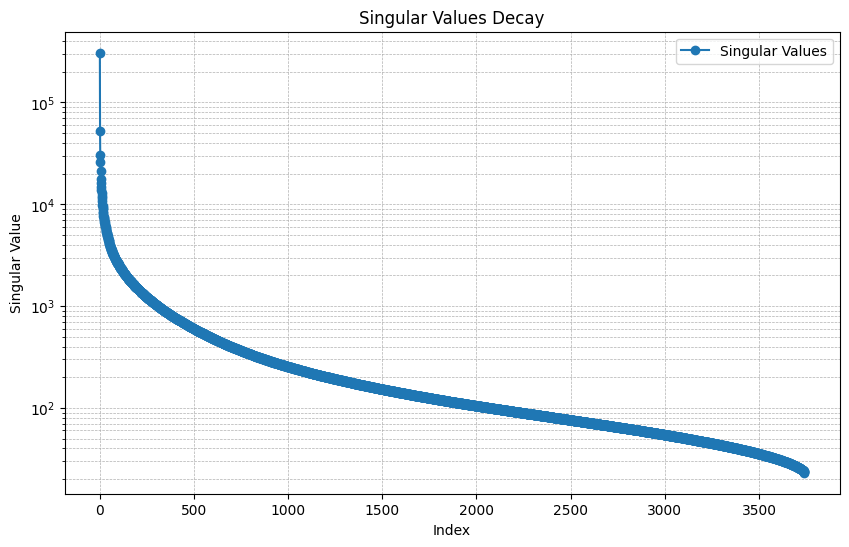

In [17]:
# Plot Singular Values
plt.figure(figsize=(10, 6))
plt.plot(singular_values['Index'], singular_values['Singular Value'], marker='o', label='Singular Values')
plt.title('Singular Values Decay')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


## Summary



A brief summary is provided, including a **comparison of the original image size and the compressed image size for a given k**. This section also computes and displays **the compression ratio** to highlight the efficiency of the method.

In [18]:
print("Summary of Analysis:")
print(f"1. Original image size: {image_size} bytes")
print(f"2. Compressed grayscale image size for k={K}: {compressed_size} bytes")
print(f"3. Compression Ratio (Grayscale): {image_size / compressed_size:.2f}")

Summary of Analysis:
1. Original image size: 24877650 bytes
2. Compressed grayscale image size for k=100: 8313600 bytes
3. Compression Ratio (Grayscale): 2.99


## Conclusion
This notebook demonstrates the efficacy of Singular Value Decomposition (**SVD**) for image compression. By retaining only the most significant singular values, we can reconstruct images with a substantial reduction in size while preserving visual quality. The decay of singular values, visualized in the analysis, highlights the potential for significant data reduction. This technique is highly adaptable and can be applied to both grayscale and RGB images, offering a robust solution for storage and transmission efficiency. Experimentation with different k values allows for control over the trade-off between compression and quality, making SVD a powerful tool in digital image processing.
